# Python for (open) Neuroscience

_Lecture 3.1_ - Introduction to Statistics and Machine learning in Pyhton

Luigi Petrucco

### Outlook

- This won't be a lecture on statistics! (I actually know very little)

 - We will see the most common modules for statistics that you can find in Python

### Descriptive statistics

#### Mean, median

In [1]:
import numpy as np

data = np.random.normal(0, 1, 1000)

print('Mean: {}'.format(np.mean(data)))
print('Median: {}'.format(np.median(data)))

Mean: -0.04590535977125415
Median: -0.0486084587871866


#### Standard deviation, variance

In [2]:
print(f'Standard deviation: {np.std(data)}')
print(f'Variance: {np.var(data)}')

Standard deviation: 0.9675457958320776
Variance: 0.9361448670323282


#### Percentiles

In [3]:
print(f' 95Percentile: {np.percentile(data, 95)}')

 95Percentile: 1.5630340549260995


## Statistical tests

The `scipy` module provides functions for pretty much any kind of classical statistics you might want to compute!

In [4]:
# In scipy we find many modules for scientific computing of all kinds.
# The module for statistics is stats:

import scipy.stats as stats

### One-sample tests

In [5]:
# One-sample t-test
data = np.random.normal(1, 1, 1000)

test_result = stats.ttest_1samp(data, 0)
test_result

TtestResult(statistic=33.815160946837224, pvalue=1.070421945077203e-167, df=999)

In [6]:
# One-sample Wilcoxon signed-rank test
stats.wilcoxon(data)

WilcoxonResult(statistic=32980.0, pvalue=5.020160926410111e-125)

### Two-sample t-test

In [7]:
data2 = np.random.normal(0, 1, 1000)

stats.ttest_ind(data, data2)

TtestResult(statistic=22.48955737368647, pvalue=4.95834859348543e-100, df=1998.0)

### Two-sample Wilcoxon rank-sum test

In [8]:
#Two-sample Wilcoxon rank-sum test
stats.ranksums(data, data2)

RanksumsResult(statistic=20.383915645368074, pvalue=2.3230712829028183e-92)

## Paired samples

### Paired t-test

In [9]:
stats.ttest_rel(data, data2)

TtestResult(statistic=22.218974577597216, pvalue=3.369854532084314e-89, df=999)

### Paired Wilcoxon signed-rank test

In [10]:
stats.wilcoxon(data, data2)

WilcoxonResult(statistic=78634.0, pvalue=9.924262149947137e-79)

## Normality tests

In [11]:
# Test normality of data
data = np.random.normal(0, 1, 1000)
stats.normaltest(data)

NormaltestResult(statistic=1.1699779989852293, pvalue=0.5571119902930295)

### QQ plots for normality tests

The best visualization to look at data normality is the quantile-quantile plot.
We can produce QQ plots using scipy.stats and matplotlib in this way:

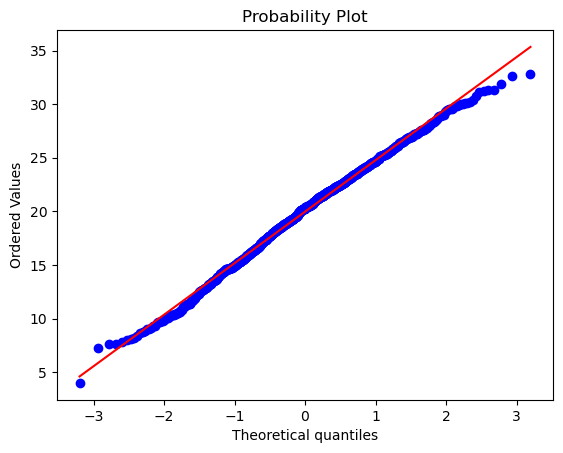

In [12]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
measurements = np.random.normal(loc = 20, scale = 5, size=1000)
# Here we pass to the `plot` argument the plotting library we want to use:
stats.probplot(measurements, dist="norm", plot=plt)
plt.show()

### One-way ANOVA

In [13]:
data = np.random.normal(0, 1, 1000)
data2 = np.random.normal(0, 1, 1000)
data3 = np.random.normal(-1, 1, 1000)
stats.f_oneway(data, data2, data3)

F_onewayResult(statistic=338.0283368490259, pvalue=4.180052002014853e-133)

### Correlation

PearsonRResult(statistic=-0.051118267475901966, pvalue=0.1061946629302082)

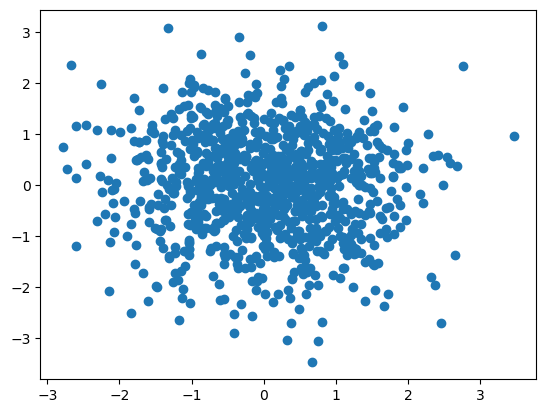

In [14]:
from matplotlib import pyplot as plt
data = np.random.normal(0, 1, 1000)
data2 = np.random.normal(0, 1, 1000)

plt.scatter(data, data2)
stats.pearsonr(data, data2)

PearsonRResult(statistic=0.7193795596859932, pvalue=4.04523229761395e-160)

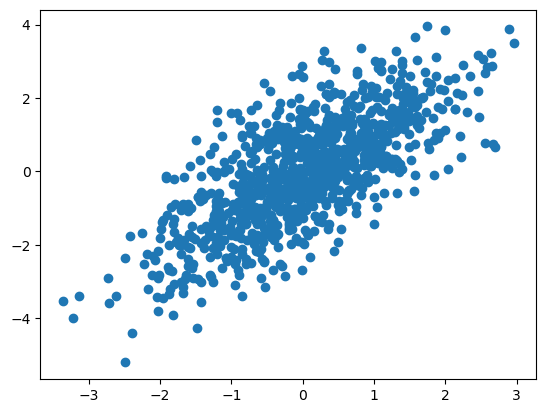

In [24]:
data = np.random.normal(0, 1, 1000)
data2 = data + np.random.normal(0, 1, 1000)

plt.scatter(data, data2)
stats.pearsonr(data, data2)

## Curve fitting

### Linear regression

Linear regression is a special case of curve fitting that you encounter very often. 

LinregressResult(slope=1.033464508602523, intercept=-0.030636672636265176, rvalue=0.7193795596859931, pvalue=4.0452322976144264e-160, stderr=0.03158768022810202, intercept_stderr=0.032322404771698836)


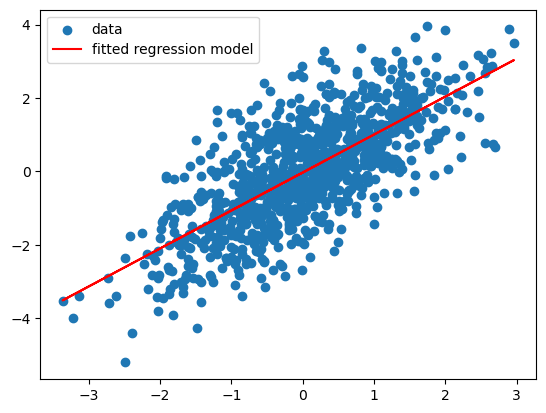

In [27]:
from scipy.stats import linregress

fitted_model = linregress(x=data, y=data2)
print(fitted_model)
plt.scatter(data, data2, label='data')
plt.plot(data, fitted_model.intercept + fitted_model.slope*data, color='r', label='fitted regression model')
plt.legend()
plt.show()

### Nonlinear regression

Similar fitting procedures are available for nonlinear distributions

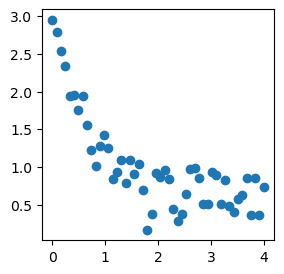

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generate data
x = np.linspace(0, 4, 50)
noise = 0.2 * np.random.normal(size=len(x))
ydata = 2.5 * np.exp(-1.3 * x) + 0.5 + noise

# plot the data
plt.figure(figsize=(3, 3))
plt.scatter(x, ydata, label='data')

In [16]:
# Define the function to fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the data
popt, pcov = curve_fit(func, x, ydata)

# retrieved parameters
popt

array([2.4161245 , 1.51009735, 0.61273342])

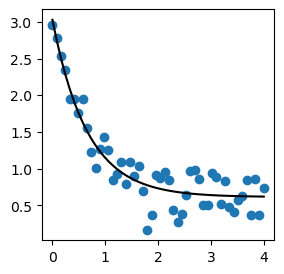

In [17]:
plt.figure(figsize=(3, 3))
plt.scatter(x, ydata, label='data')
plt.plot(x, func(x, popt[0], popt[1], popt[2]), c="k", label='fit')

In [18]:
pcov

array([[ 0.01943872,  0.01037895, -0.00069709],
       [ 0.01037895,  0.03110579,  0.00615012],
       [-0.00069709,  0.00615012,  0.00267825]])

(Practicals 3.2.0)

## More advanced statistics using statsmodels

The `statsmodels` module provides a more complete set of statistical tools, including:
- Linear models
- Generalized linear models
- Multivariate statistics
- ...

**Disclaimer**

Python is generally considered less powerful than R when it comes to advanced statistical models. I do not know much statistics, so I take the experts' opinion on this point!

### Linear models

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = sm.datasets.get_rdataset('Guerry', 'HistData').data
data = data[['Lottery', 'Literacy', 'Wealth', 'Region']].dropna()
data.head()

,Lottery,Literacy,Wealth,Region
0,41,37,73,E
1,38,51,22,N
2,66,13,61,C
3,80,46,76,E
4,79,69,83,E


In [29]:
model = smf.ols('Lottery ~ Literacy + Wealth + Region', data=data)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Mon, 10 Jun 2024   Prob (F-statistic):           1.07e-05
Time:                        15:14:40   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

# Machine learning using `scikit-learn`

`scikit-learn` is the library we use to assemble machine learning pipelines.

It includes functions/classes for: 
- data preprocessing (normalization, etc.)
- dataset splitting (iterations over train/test splits, etc.)
- dimensionality reduction
- clustering 
- regression
- ...

It does not include functions/classes to build deep learning models.

In [30]:
# requires pip/conda install scikit-learn
from sklearn import preprocessing

## Data preprocessing

The most common data preprocessing tool is a scaler: an object that can be used to 
consistently scale data using consistent parameters.

In [31]:
import numpy as np 
X_train = np.array([[ 3.,   0.,   0.],
                    [ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [35]:
print("Data means (one per column): ", scaler.mean_)

Data means (one per column):  [1.5  0.   0.25]


In [36]:
print("Data std (one per column): ", scaler.var_)

Data std (one per column):  [1.25   0.5    1.1875]


In [37]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 1.34164079,  0.        , -0.22941573],
       [-0.4472136 , -1.41421356,  1.60591014],
       [ 0.4472136 ,  0.        , -0.22941573],
       [-1.34164079,  1.41421356, -1.14707867]])

There are also other scalers for [min-max normalization](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization)) (`MinMaxScaler`), etc.

# Dimensionality reduction

### Principal component analysis

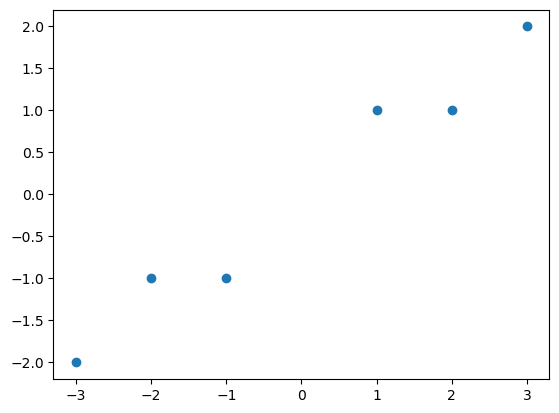

In [38]:
from sklearn.decomposition import PCA

# A simple tw-dimension dataset:
from sklearn import datasets

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

plt.figure()
plt.scatter(X[:, 0], X[:, 1])

In [39]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)

#print(pca.singular_values_)

[0.99244289 0.00755711]


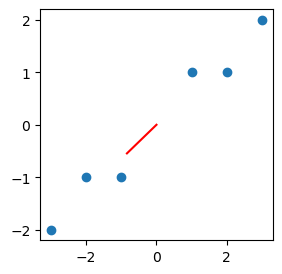

In [40]:
plt.figure(figsize=(3, 3)  )
plt.scatter(X[:, 0], X[:, 1])
plt.plot([0, pca.components_[0, 0]], [0, pca.components_[0, 1]], 'r')

(-3.965834174898737,
 3.965834174898737,
 -0.3229365667890351,
 0.3229365667890351)

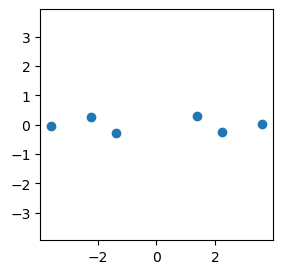

In [41]:
transformed = pca.transform(X)

plt.figure(figsize=(3, 3))
plt.scatter(transformed[:, 0], transformed[:, 1])
plt.axis("equal")

## Data splitting

Scikit-learn offers smart ways of splitting data into training and test sets:

In [42]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# let's create an example dataset:
X, y = make_blobs(n_samples=50000, centers=5, n_features=5, random_state=3)

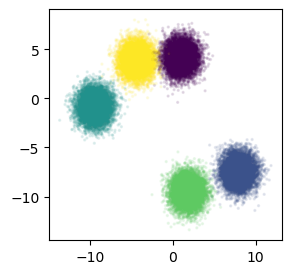

In [43]:
# This is the whole dataset:
plt.figure(figsize=(3, 3))
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.1, s=2)
plt.show()

The good way of doing clustering, regression, etc. is to always fit the parameters on a fraction of the data, and test their goodness on the other to avoid overfitting.

We can do it using the `train_test_split()` function:

In [44]:

X_train, X_test, Y_train, Y_test = train_test_split(X, y, 
                                                    test_size=0.1,  # fraction for testing
                                                    stratify=y, random_state=50)

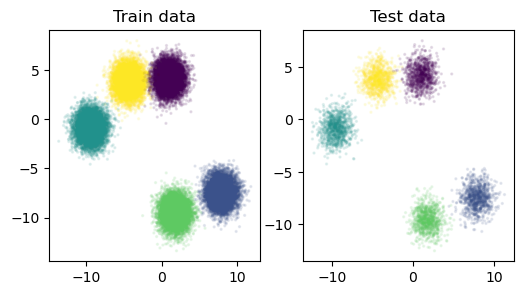

In [45]:
f, axs = plt.subplots(1, 2, figsize=(6, 3))
axs[0].scatter(X_train[:, 0], X_train[:, 1], c=Y_train, alpha=0.1, s=2)
axs[1].scatter(X_test[:, 0], X_test[:, 1], c=Y_test, alpha=0.1, s=2)

axs[0].set_title("Train data")
axs[1].set_title("Test data")
plt.show()

There are also tools to directly loop over multiple splits of the data to perform multiple iterations of our clustering/regression procedure:



In [46]:
from sklearn.model_selection import KFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],
              [0, 2], [1, 2], [5, 2], [0, 1]])

kf = KFold(n_splits=4)
kf.get_n_splits(X)
# print(kf)

for train_index, test_index in kf.split(X):
    print("train data :", X[train_index, :], "test data:", X[test_index, :])

train data : [[1 2]
 [3 4]
 [0 2]
 [1 2]
 [5 2]
 [0 1]] test data: [[1 2]
 [3 4]]
train data : [[1 2]
 [3 4]
 [0 2]
 [1 2]
 [5 2]
 [0 1]] test data: [[1 2]
 [3 4]]
train data : [[1 2]
 [3 4]
 [1 2]
 [3 4]
 [5 2]
 [0 1]] test data: [[0 2]
 [1 2]]
train data : [[1 2]
 [3 4]
 [1 2]
 [3 4]
 [0 2]
 [1 2]] test data: [[5 2]
 [0 1]]


# Data clustering

In [47]:
import numpy as np

# Create clustered data
X, y = make_blobs(n_samples=50000, centers=4, cluster_std=2,
                  n_features=2, random_state=10)


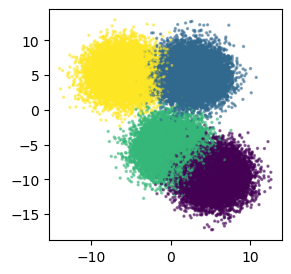

In [48]:
plt.figure(figsize=(3, 3))
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, s=2)

In [49]:
from sklearn.cluster import KMeans

# Split data in test and train:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=50)

kmeans = KMeans(init="k-means++", n_clusters=4, n_init=10, random_state=4)
kmeans.fit(X_train)

Y_predicted = kmeans.predict(X_test)

Text(0.5, 1.0, 'Predicted test clusters:')

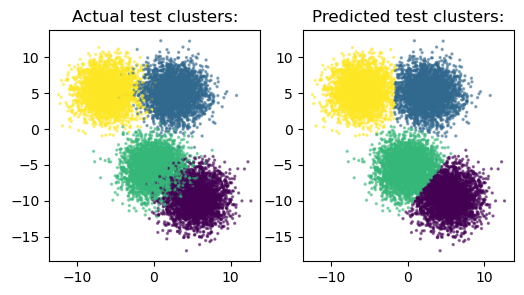

In [50]:
f, axs = plt.subplots(1,2,figsize=(6, 3))

axs[0].scatter(X_test[:, 0], X_test[:, 1], c=Y_test, alpha=0.5, s=2)
axs[0].set_title("Actual test clusters:")

axs[1].scatter(X_test[:, 0], X_test[:, 1], c=Y_predicted, alpha=0.5, s=2)
axs[1].set_title("Predicted test clusters:")

# Measuring accuracy

`sklearn` offers also many tools to measure the accuracy of our regression and clustering.
In this case, a suitable visualization of the goodness of our method is the
confusion matrix, that shows how many data points have been clustered wrongly

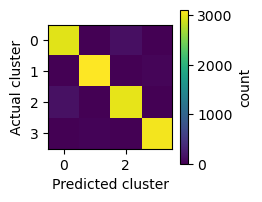

In [51]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, Y_predicted)

f, ax = plt.subplots(figsize=(2,2))
im = ax.imshow(conf_matrix)
ax.set(xlabel="Predicted cluster", ylabel="Actual cluster")
plt.colorbar(im, label="count")

(Note: sometimes we might have to match cluster IDs before computing the confusion matrix) **(MATTEO: I think this is worth an explanation)**

(Practicals 3.2.1)